In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv'
data = pd.read_csv(url)

## Examine Data

In [19]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##### We do not have any null value in order data set. but all the data is in object from and we need to change data to int pr float.

In [21]:
# Let's take look on our data size.
data.shape

(8124, 23)

###### our data have 8124 rows and 23 columns.

In [22]:
data['class'].unique()

array(['p', 'e'], dtype=object)

###### In class column we have 2 types of mushrooms poisinous(p) or edible(e). Also other 22 features has string values too. So we should change the data types to int or float.

poisinous(p) => 4208
edible(e) => 3916


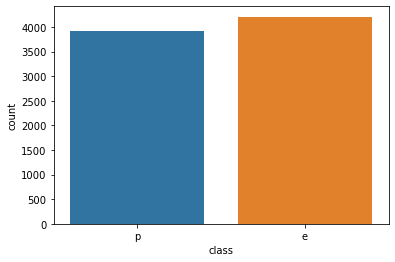

In [24]:
#Let's plot each class frequency
sns.countplot(x='class',data=data)
plt.show
print('poisinous(p) =>',data['class'].value_counts()[0])
print('edible(e) =>',data['class'].value_counts()[1])

##### Edible data we have 3916 and poisinous data we have 4208, thus we can say our data is do not have class imbalance problem.




# EDA
##### As our complete data type is string we have to convert it numaric values using Encoding techqniues.

In [28]:
from sklearn.preprocessing import LabelEncoder #importing LabelEncoder 
lc = LabelEncoder() # instantiating label Encoder
df =pd.DataFrame() # Creating empty data set
for i in data.columns:
    df[i] = lc.fit_transform(data[i]) 

In [29]:
# Let's check how our dataset looks like.
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


###### So now our class value is p = 1 and e = 0. let's check data in detail.

In [30]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


###### As we can see veil-type content zero value so we can drop this column.

In [31]:
df.drop(['veil-type'],axis=1, inplace=True)

## Let's check correlation between features and class. Using heatmap and different plots.

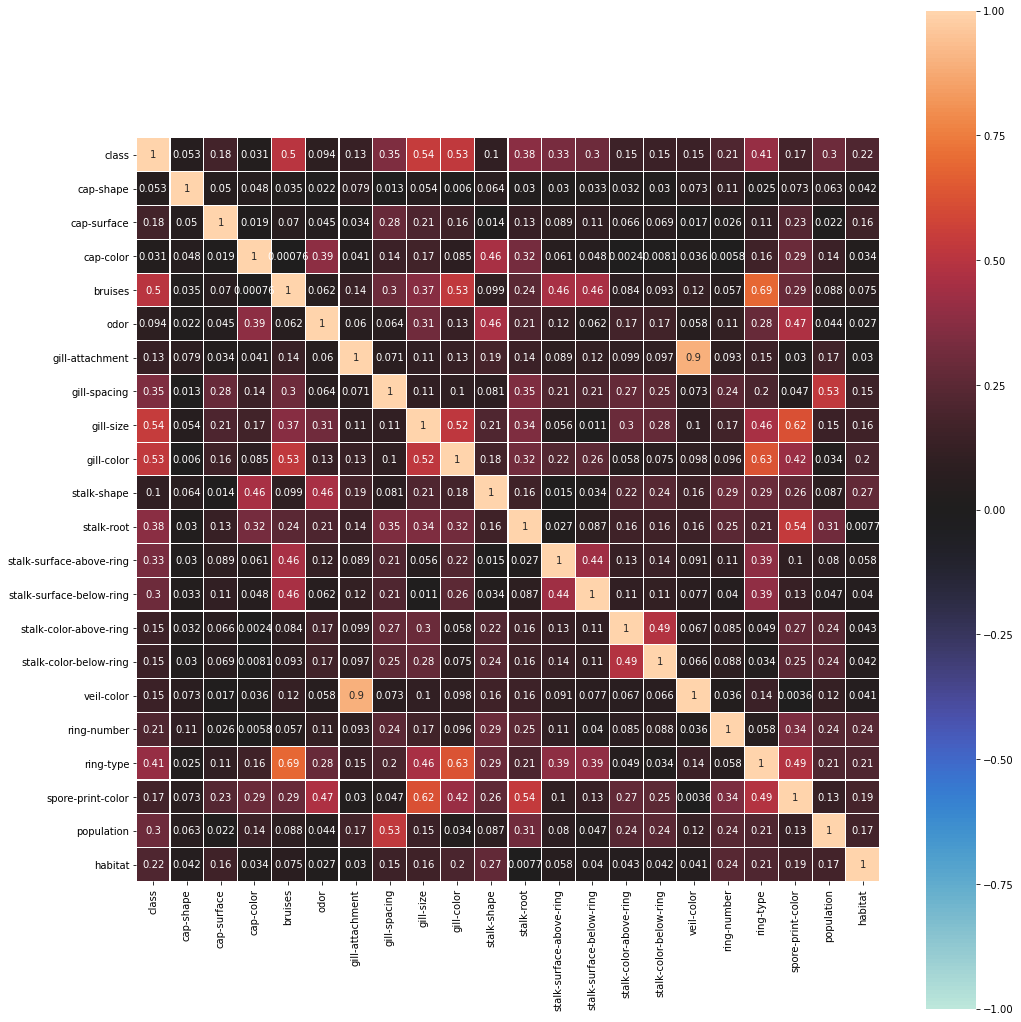

In [35]:
df_corr = df.corr().abs()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0, linewidths=0.1)
plt.tight_layout()

###### As we can see there is correlation between class and ring-type, gill-color, gill-size, stalk-root,bruises. But we also see cap-shape has no strong relationship with any other column so we can drop it off.

In [38]:
df.drop(['cap-shape'],axis=1,inplace=True)

## Multivariate Analysis

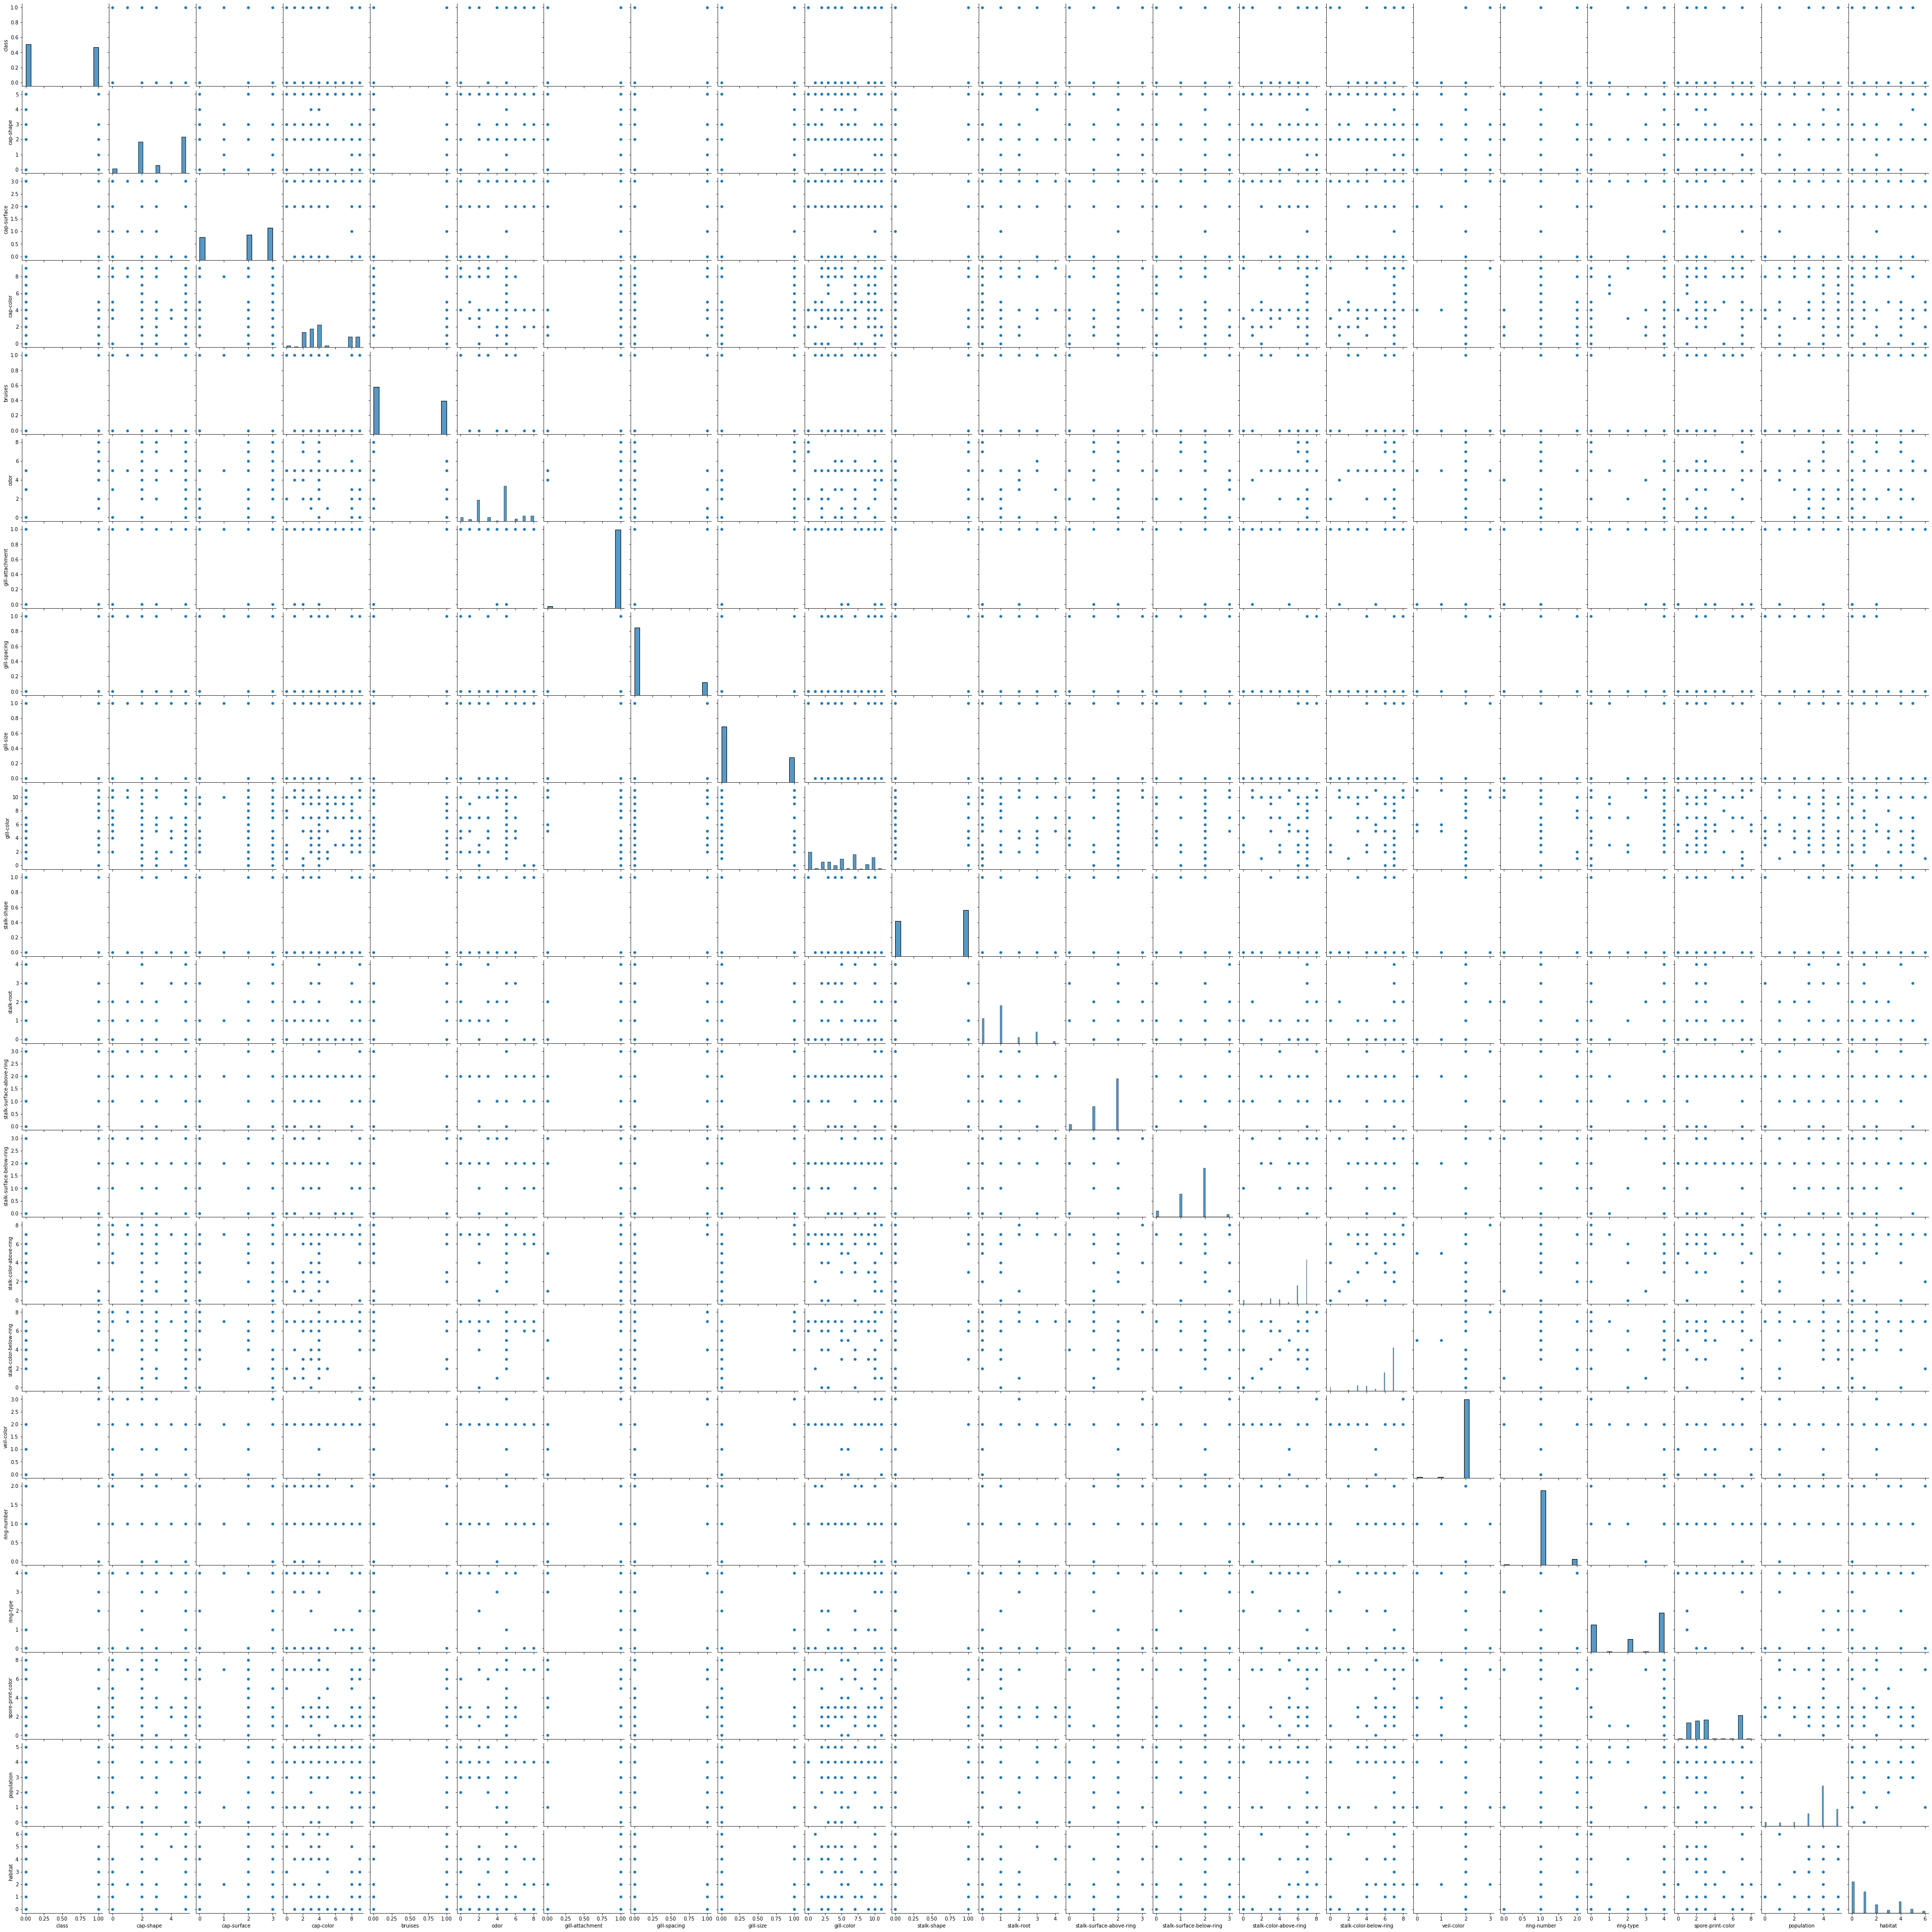

In [36]:
sns.pairplot(df)

In [39]:
#### Not able to unders relationship.

<function matplotlib.pyplot.show(close=None, block=None)>

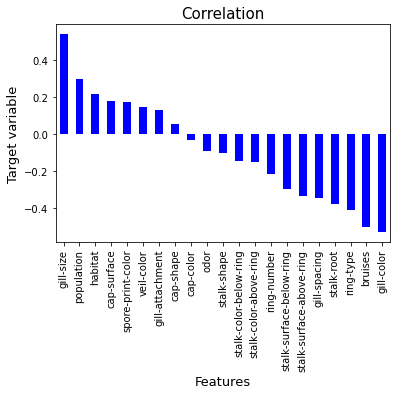

In [37]:
#Let's Plot Bar chart to check correlation between Features(independent variables) and Label(Target variable).
df.corr()['class'].sort_values(ascending=False).drop(['class']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=13)
plt.ylabel('Target variable',fontsize=13)
plt.title('Correlation',fontsize=15)
plt.show

### here we can see some features shows postive correlation and some shows negative correlations.

## Data Pre-Processing.

In [42]:
x = df.drop(['class'],axis=1)

In [43]:
y= df['class']

#### Let's scale our data using Standard scaler.

In [45]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x = scaler.fit_transform(x)

In [49]:
from sklearn.decomposition import PCA  # Import class for PCA

for i in range(2, 20):
    pca = PCA(n_components=i)  # n_components = Specify the number of features you want to reduce.
    pca.fit_transform(x)
    print("Sum of Variance Ratio in " + str(i) + " Components: ", sum(pca.explained_variance_ratio_))

Sum of Variance Ratio in 2 Components:  0.32369940783152495
Sum of Variance Ratio in 3 Components:  0.44369755680453976
Sum of Variance Ratio in 4 Components:  0.5505658372060105
Sum of Variance Ratio in 5 Components:  0.6353141236116071
Sum of Variance Ratio in 6 Components:  0.7048916772167448
Sum of Variance Ratio in 7 Components:  0.7526185833325711
Sum of Variance Ratio in 8 Components:  0.7915587880719761
Sum of Variance Ratio in 9 Components:  0.8272576534189654
Sum of Variance Ratio in 10 Components:  0.8561519396340413
Sum of Variance Ratio in 11 Components:  0.8832734980181995
Sum of Variance Ratio in 12 Components:  0.9088052176017625
Sum of Variance Ratio in 13 Components:  0.9328825325431442
Sum of Variance Ratio in 14 Components:  0.9521366964247958
Sum of Variance Ratio in 15 Components:  0.9676998526546743
Sum of Variance Ratio in 16 Components:  0.9786466275158958
Sum of Variance Ratio in 17 Components:  0.9866489397663705
Sum of Variance Ratio in 18 Components:  0.993

In [50]:
### As we can see if user 14 features then also we will cover 95% data. So let's use PCA value as 14 features.

In [52]:
pca = PCA(n_components=14)
x = pca.fit_transform(x)

## Spliting data for train test.

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=45)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(6093, 14) (6093,) (2031, 14) (2031,)


# Model building

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report # for check accurcay F1 score for model evalution.

In [56]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [63]:
y_pred = lg.predict(x_test)

In [64]:
print('Train score for logistic Regression',lg.score(x_train,y_train))
print('Test score for logistic Regression',lg.score(x_test,y_test))

Train score for logistic Regression 0.9182668636139832
Test score for logistic Regression 0.9098966026587888


In [69]:
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1057
           1       0.93      0.88      0.90       974

    accuracy                           0.91      2031
   macro avg       0.91      0.91      0.91      2031
weighted avg       0.91      0.91      0.91      2031



In [57]:
Kn = KNeighborsClassifier()
Kn.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
y_pred_Kn = Kn.predict(x_test)

In [65]:
print('Train score for KNeighbors Classifer',Kn.score(x_train,y_train))
print('Test score for KNeighbors Classifer',Kn.score(x_test,y_test))

Train score for KNeighbors Classifer 1.0
Test score for KNeighbors Classifer 1.0


In [70]:
acc = classification_report(y_test,y_pred_Kn)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      1.00      1.00       974

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [58]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
y_pred_rf = rf.predict(x_test)

In [67]:
print('Train score for RandomForestClassifier',rf.score(x_train,y_train))
print('Test score for RandomForestClassifier',rf.score(x_test,y_test))

Train score for RandomForestClassifier 1.0
Test score for RandomForestClassifier 1.0


In [71]:
acc = classification_report(y_test,y_pred_rf)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      1.00      1.00       974

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [59]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred_dt = dt.predict(x_test)

In [66]:
print('Train score for DecisionTreeClassifier',dt.score(x_train,y_train))
print('Test score for DecisionTreeClassifier',dt.score(x_test,y_test))

Train score for DecisionTreeClassifier 1.0
Test score for DecisionTreeClassifier 0.9945839487936977


In [72]:
acc = classification_report(y_test,y_pred_dt)
print(acc)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1057
           1       0.99      0.99      0.99       974

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



##### As we can see KNeighbors and Random forest are giving same  accurcary hence we will go for cross validataion.

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
print('CV score for logistic regression:- ',cross_val_score(lg,x,y,cv=5).mean())
print('CV score for KNeighbors Classifer:- ',cross_val_score(Kn,x,y,cv=5).mean())
print('CV score for RandomForestClassifier:- ',cross_val_score(rf,x,y,cv=5).mean())
print('CV score for DecisionTreeClassifier:- ',cross_val_score(dt,x,y,cv=5).mean())

CV score for logistic regression:-  0.7963688518378174
CV score for KNeighbors Classifer:-  0.8694840469874953
CV score for RandomForestClassifier:-  0.8581550587343691
CV score for DecisionTreeClassifier:-  0.9064328912466844


### AS we can see Decision tree classifier is giving highest value 90%. So we will choose Decision Tree Classifier.

### Performing hyper parameter tuning for Decision Tree Calssifer.

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param = {'max_depth':np.arange(2,50),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

In [77]:
GCV = GridSearchCV(DecisionTreeClassifier(),param,cv=5)

In [78]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [79]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto'}

#### Best parameter for our Decision tree model are showing above. Lets biult model using this parameters.

In [81]:
Final_model = DecisionTreeClassifier(criterion='entropy',max_depth=14,max_features='auto')
Final_model.fit(x_train,y_train)
y_predict = Final_model.predict(x_test)

In [84]:
# Let's check accuracy score
acc =classification_report(y_test,y_predict)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      1.00      1.00       974

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



#### Let's save our final model.

In [85]:
import joblib
joblib.dump(Final_model,'DT_model.pkl')

['DT_model.pkl']

In [86]:
from sklearn import metrics

In [90]:
metrics.roc_auc_score(lg,x_test,y_predict)

C:\Users\Arvind\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass average=[0 0 1 ... 1 0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


ValueError: Expected array-like (array or non-string sequence), got LogisticRegression()